# 使用sklearn搭建linear regression(boston house pricing)

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
boston = load_boston()

D:\software\Anaconda3\envs\loc_pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [14]:
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)

In [15]:
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
# 标准化
boston_dataset = (boston_dataset-boston_dataset.mean(axis=0))/boston_dataset.std(axis=0)
boston_dataset['y'] = boston.target

In [17]:
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734,22.4
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355,20.6
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076,23.9
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446,22.0


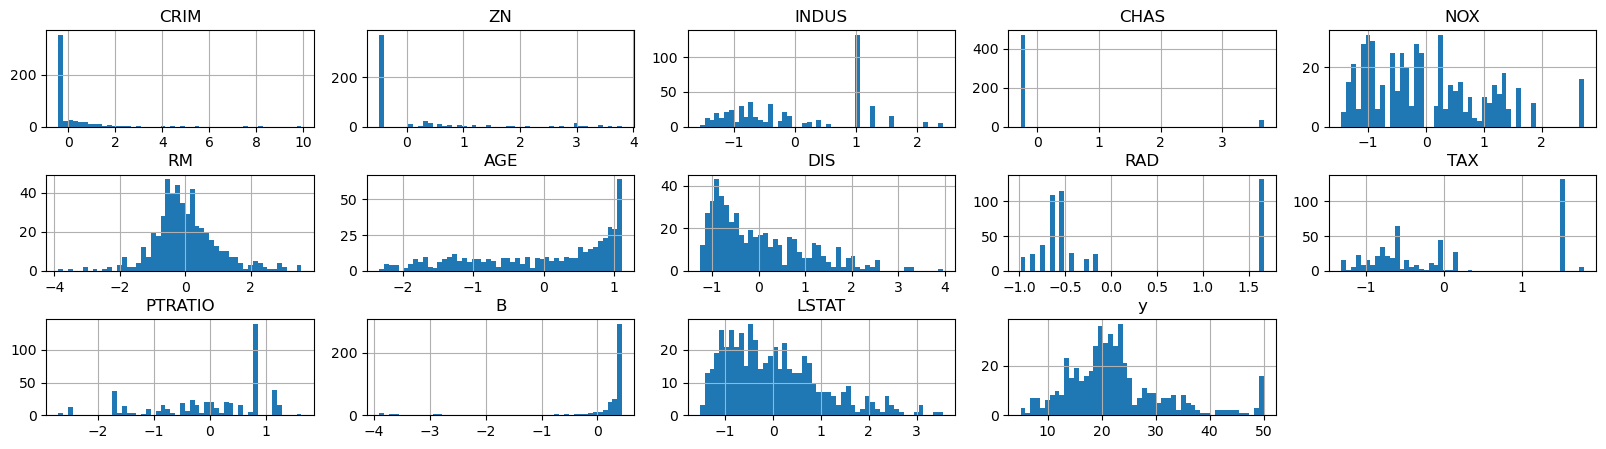

In [20]:
# 绘制各个feature的情况
fig = plt.figure(figsize=(20,5))
for i, feature in enumerate(boston_dataset.columns):
    ax = fig.add_subplot(3,5,i+1)
    ax.set_title(feature)
    boston_dataset.loc[:,feature].hist(bins=50, ax=ax)
plt.subplots_adjust(hspace=0.5)